#  License Plate Grabber
ECE 278A - Image Processing<br/>
Winter 2022<br/>

Created By:<br/>
Roger Lin (yuxilin@ucsb.edu)<br/>
Taian Song (taiansong@ucsb.edu)


## Objective
The objective of this project is to seperate license plates from images of cars using image processing techniques introduced in the lectures.

## Introduction
The data set we use from Caltech contains 126 images of cars taken from the rear, here for demonstration we will only process 10 images.
http://www.vision.caltech.edu/Image_Datasets/cars_markus/cars_markus.tar

## Methods
### Packages


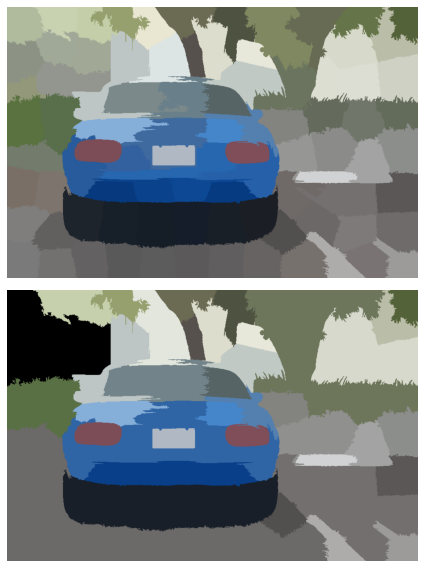

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from lib.img_load import *
from lib.img_seg import *
from lib.img_bin import *
from skimage.segmentation import slic
from skimage import color

# segmented_img = img_seg(img, 30, 40)
# plt.imshow(img, cmap='gray')
# plt.show()
# plt.imshow(segmented_img,cmap='gray')
# plt.show()
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt

img = img_load('data/image_0008.jpg')

labels1 = segmentation.slic(img, compactness=30, n_segments=100, start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1)
labels2 = graph.cut_threshold(labels1, g, 29)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,
                       figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

# from skimage.feature import canny
# img_gray = color.rgb2gray(out2)
# edges = canny(img_gray)
# plt.imshow(edges,cmap='gray')
# plt.show()


numpy.ndarray

### Histrogram Matching

### Smoothing

### Contour Detection

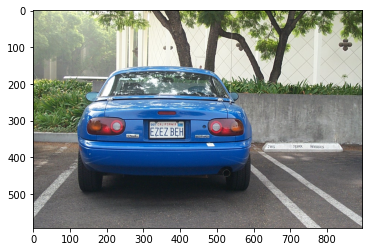

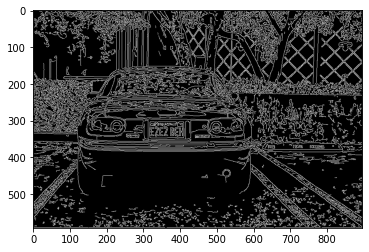

In [7]:
from skimage.feature import canny
img_gray = color.rgb2gray(img)
edges = canny(img_gray, sigma=1)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(edges,cmap='gray')
plt.show()

### Segmentation

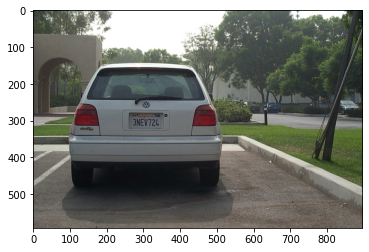

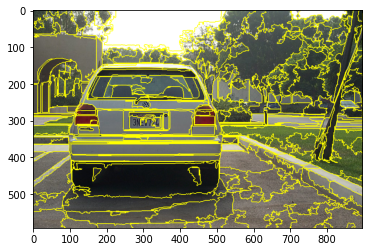

In [2]:
from skimage.segmentation import felzenszwalb
img = img_load('data/image_0002.jpg')
segments = felzenszwalb(img, scale=50, sigma=1, min_size=200)
segmented_img = mark_boundaries(img, segments)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(segmented_img,cmap='gray')
plt.show()



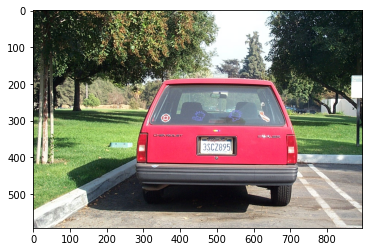

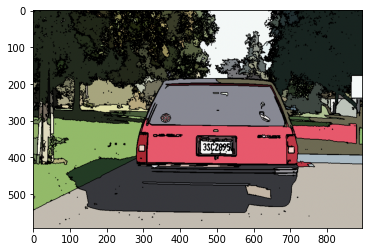

In [30]:
from lib.img_seg import *

img = img_load('data/image_0021.jpg')
segmented_img = img_seg(img, 0.15)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(segmented_img,cmap='gray')
plt.show()

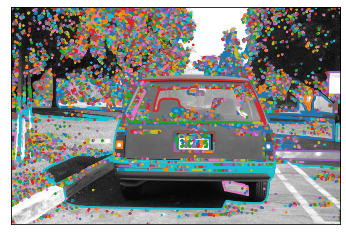

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


# Construct some test data
r = color.rgb2gray(img)

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.5)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

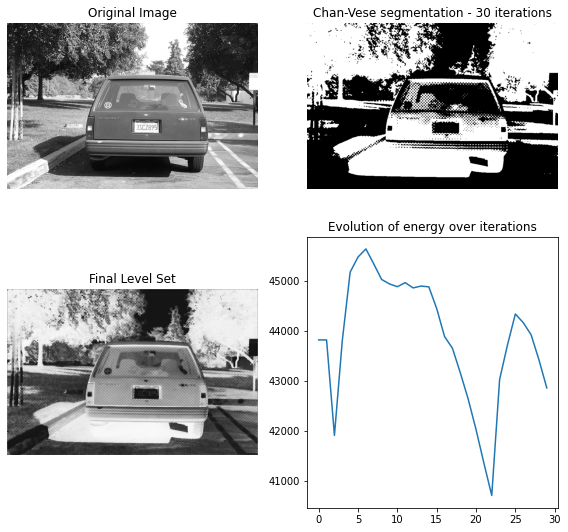

In [29]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
from lib.img_load import *
img = color.rgb2gray(img_load('data/image_0021.jpg'))

image = img_as_float(img)
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3,
               max_num_iter=30, dt=0.5, init_level_set="checkerboard",
               extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

### Alignment and Sizing

### Binarization for Text Recognition

## Results

## Summary